# K-means Clustering Example - Notes

This project was based on a tutorial on YouTube by the **Dataquest** channel. The video's title is 'K-means Clustering From Scratch In Python - Machine Learning Tutorial'. You can find the dataset used in this example on **Kaggle** under the name 'FIFA 22 complete player dataset' (see the README). Here, we focus on the 'players_22.csv' file.


<h3 style="color:darkblue;">Introduction</h3> 
The 5 features that we're going to focus on for the clustering are: 

1. overall rating
2. potential
3. value_eur
4. wage_eur
5. age

<h3 style="color:darkblue;">Cleaning the data</h3> 

In [ ]:
!pip install kagglehub

In [89]:
import os
import kagglehub
import pandas as pd 
import numpy as np

In [91]:
path = kagglehub.dataset_download("stefanoleone992/fifa-22-complete-player-dataset")
players = pd.read_csv(os.path.join(path, 'players_22.csv')) # Loading the dataset

/var/folders/hy/80zsfj_n3tlb0th3dm0r9hkh0000gn/T/ipykernel_24949/1321354120.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv(os.path.join(path, 'players_22.csv')) # Loading the dataset


In [93]:
players # Checking 

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


First, we need to define a list of the features that we want to cluster based on:

In [96]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

The **'dropna'** method from pandas library is used to drop any rows where one of these columns (features) has a null or missing value. This makes sure that we don't have any missing values in what we're going to be clustering, since most clustering algorithms aren't able to work with missing values. 

In [99]:
players = players.dropna(subset=features)

In [101]:
data = players[features].copy() 

In [103]:
data # Checking

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


<h3 style="color:darkblue;">Kmeans Implementation - Steps</h3> 

These are the 5 steps we need to follow in order to implement the K-means algorithm: 

#### Scale the data 
Our data needs to be scaled from a certain value range to another. Right now, if we look at our data, we can see that some values are much larger than those in other columns. This means that, once we perform clustering, the columns with the largest values will have the most influence on the results — but that's not necessarily what we want. We want every column to be treated equally during clustering. To achieve this, we need to rescale the values in each column so that all of them fall within the range of 1 to 10. This helps ensure that no single column dominates the others in the clustering process.

#### Initialize random centroids
For a better understanding of what a random centroid is, check my K-means notes under the DS - Theory folder.

#### Label each data point 
Based on how far each data point is from the centroids, we assign it to a cluster. This gives us a cluster assignment for each football player. Each data point corresponds to a row in our dataset, and each row represents one football player.

#### Update centroids 
We examine each player and their cluster label, then calculate the center point (mean) of each cluster to update the centroids.

#### Repeat steps 3 and 4 
Continue labeling data points and updating centroids until the centroids stop changing — this means the algorithm has converged.

<h3 style="color:darkblue;"> Scaling the Data</h3>

To scale our data, we're going to use a method called **Min-Max Scaling**. This technique helps bring all values in our dataset into a common range, which prevents features with larger values from dominating the clustering process. To help you understand this method, imagine this is our original data: <br><br>
  
**Original data: [10, 20, 30]**<br><br>

The first thing we'll do is subtract the minimum value in each column (data.min()) from each value in the colum (dat). This makes the smallest value in each column equal to 0. Using our example, the minimum value in our data is 10. After this step, our data will look something like this:<br><br>

**min(data) = 10** 

**Subtracting 10 from every value:**

**[10 - 10, 20 - 10, 30 - 10] → [0, 10, 20]**<br><br>

Now, we divide by the range (data.max() - data.min()). This scales all values between zero and one.<br><br>

**max(data) = 30, so range is 30 - 10 = 20**
**Divide each shifted value by 20: [0/20, 10/20, 20/20] → [0.0, 0.5, 1.0]**<br><br>

Then, we multiply all the values by nine. This changes the range from 0–1 to 0–9.<br><br> 

**[0.0, 0.5, 1.0] * 9 → [0.0, 4.5, 9.0]**<br><br>

Finally, we add one to all the values, so that everything is on a one to ten scale.<br><br>

**[0.0, 4.5, 9.0] + 1 → [1.0, 5.5, 10.0]**<br><br>

**Note:** You can change the scale (e.g., 1–100 or 0–5) by adjusting the multiplier and the value you add at the end. However, you should avoid starting at 0 or negative numbers if you want to ensure all features have consistent, positive influence in the clustering process.

In [108]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [110]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


Note that we also preserved the variance in our data. If one player had a much higher potential than another player, that's still preserved in our data. 

<h3 style="color:darkblue;"> Initializing Random Centroids</h3>

To initialize our random centroids, we need to assign a random value for each feature. A centroid is similar to a row in the dataset — it contains all the features we want to use. However, these values need to be selected randomly from the data.<br><br>

**centroid = data.apply(lambda x: float(x.sample()))**<br><br>

1. The **apply method** is used to apply a function along each column in the dataset. In this case, it will apply a function to each feature (or column).
2. **lambda x: x.sample()**: for each column, the sample() function selects a single random value from that column. This means the centroid's value for that feature will be a random value from the corresponding feature in the dataset.
3. Since x.sample() returns a pandas series, we use **float()** to convert the result into a scalar value (a single number).

#### Scaling this for multiple centroids 
Now we have a single centroid, so we need to scale this method up to get multiple centroids. If we're looking for **k** clusters, then we need **k** centroids. For this, we will initialize a list called centroids and we'll say for i in range k, create the centroid, then add it to our list. We will do this by creating a function. The return here combines all of the individual panda series into a data frame.

In [114]:
def random_centroids(data, k): 
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [116]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,3.347826,3.934783,2.956522,3.934783,6.869565
potential,4.130435,6.086957,6.869565,6.086957,6.282609
wage_eur,1.115880,1.010300,1.000000,1.003863,1.064378
value_eur,1.087731,1.189797,1.015820,1.064534,1.277946
age,4.000000,2.333333,3.333333,3.000000,2.333333


<h3 style="color:darkblue;">Labeling Each Data Point</h3>

Let's create a function that labels each data point based on the cluster centers. This function will look at each player in our data and calculate the Euclidean distance between that data point and each cluster center. Once we have the distances, we need to identify which cluster center is closest to that data point.

#### Euclidean Distance Formula
To calculate the distance between a data point and a cluster center, we'll use the **Euclidean distance** formula. Here's the breakdown:

1. Subtract the corresponding feature values of the data point and centroid.
2. Square the differences (this eliminates any negative signs).
3. Sum all squared differences (for all features).
4. Take the square root of the sum to get the final distance.

As said before, this formula will give us a number that represents the distance from each player to each cluster centroid. Now, we want to apply this to all of our centroids (**centroids.apply()**) and once we have the result, we assign it to distances.<br><br>

**distances.idxmin(axis=1)**<br><br>

This part finds the index (or label) of the centroid that is closest to each player. It returns the cluster index that has the minimum distance for each player.

In [119]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [121]:
labels = get_labels(data, centroids)

In [123]:
labels # Checking

0        4
1        4
2        4
3        4
4        4
        ..
19234    0
19235    0
19236    0
19237    0
19238    0
Length: 19165, dtype: int64

We can check how many players are in each cluster: 

In [126]:
labels.value_counts()

0    8493
3    4252
4    3478
1    2938
2       4
dtype: int64

<h3 style="color:darkblue;">Updating Centroids</h3>

Once we've assigned each player to a cluster based on our initial random centroids, the next step is to update the centroids based on which players are assigned to each cluster. To do this, we need to calculate the **geometric mean** of each feature for all the players in a cluster. The geometric mean is the mean of the points in Euclidean space, and it gives us the center of each cluster.


#### Geometric Mean 
The geometric mean is a way to calculate the "average" of numbers that are multiplied together. In Euclidean space, the geometric mean gives us a point that is the center of all other points in the cluster. It’s different from the arithmetic mean because we multiply the values and take the nth root (where n is the number of points in the cluster).

Calculating the geometric mean directly by multiplying large numbers together can result in very large values, which can be inefficient and hard to handle in memory. Instead, we will calculate the geometric mean using logarithms, which is much more efficient:

1. Take the natural logarithm (log) of each data point.
2. Calculate the average of these logarithmic values.
3. Apply the exponential function (exp) to the result, which gives us the geometric mean.

#### Code Explanation 
**centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T**

1. **data.groupby(labels)**: groups the data by the cluster labels (each player's assigned cluster). It separates the players into groups based on which cluster they belong to.
2. **.apply(lambda x: np.exp(np.log(x).mean()))**: for each group (cluster), we:<br><br>
   **np.log(x)**: take the natural logarithm of the feature values in that cluster.<br>
   **.mean()**: calculate the mean of the log-transformed values.<br>
   **np.exp()**: take the exponential of the result to get the geometric mean of the original feature values.<br>
   **.T**: after the calculation, the result will have columns representing features and rows representing centroids. However, we want the centroids as columns and the features as rows. So, we transpose the result using .T to switch the rows and columns.

In [129]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

<h3 style="color:darkblue;">Final Touches</h3>

It's good if we can visualize what's happening as we iterate in the algorithm and the loop continuous. To do this, we are going to write a quick function to plot the cluster assignments at each step in our algorithm at each iteration. 

In [132]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from IPython.display import clear_output

1. **from sklearn.decomposition import PCA**: PCA stands for principal components analysis, it helps us visualize our data. In this case, we have 5 dimensional data (features), but you can only visualize easily two-dimensional data. Because of this, we need to find a way to turn this five-dimensional data into two-dimensional data, PCA helps us do that. 
2. **import matplotlib.pyplot as plt**: do the plot. 
3. **from IPython.display import clear_output**: this helps us clear the jupyter notebook output each time we plot a new graph. 

In [135]:
def plot_clusters(data, labels, centroids, iteration): 
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait=True) 
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

This part of the code transforms our data into 2d data: <br><br>

**pca = PCA(n_components=2)** # Initialize PCA model with 2 columns<br>
**data_2d = pca.fit_transform(data)** # Runs the model<br>
**centroids_2d = pca.fit_transform(centroids.T)** # .T is beacuse PCA expects our data to be in the form where the columns == features and rows == data points<br><br>


This part of the code plots our clusters, centroids and color them:<br><br>     
**clear_output(wait=True)** # Clears the last graph to show the next<br>
**plt.scatter()** # Colors the data point according to which cluster the data point is part of<br>
**plt.scatter()** # Colors the centroids<br>
**plt.show()** # Shows our graph<br>

#### Writing the body of k-means

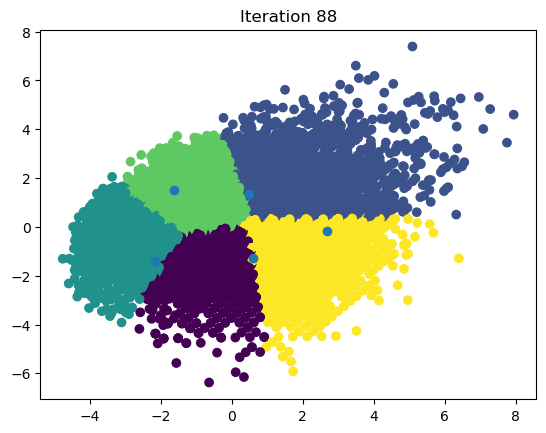

In [139]:
max_iterations = 100 # Number of times the algorithm iterate unless the cluster stops changing
centroids_count = 5 # Number of clusters 

# We stop the algorithm when old_centroids == centroids
centroids = random_centroids(data, centroids_count)
old_centroids = pd.DataFrame()
iteration = 1 # Start on iteration 1

# Stop the loop if we've hit our max of iterations or centroids == old_centroids
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids 

    # Which cluster each player goes into
    labels = get_labels(data, centroids)
    # Update centroids values based on the geometric mean of all players assigned to that cluster
    centroids = new_centroids(data, labels, centroids_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

<h3 style="color:darkblue;">Analysis</h3>

Once the algorithm ends, we can take a look at the centroids and see what they represent:

In [141]:
centroids

,0,1,2,3,4
overall,4.011914,6.484409,2.503032,4.328121,5.305913
potential,4.016291,6.800155,4.455514,5.912348,4.950001
wage_eur,1.045248,1.688172,1.015908,1.074859,1.178221
value_eur,1.026961,1.457804,1.013544,1.063587,1.061776
age,4.487395,4.029306,2.272253,2.659796,5.931729


In [142]:
players[labels == 0] [["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
5063,Vítor Angulho,70,70,6000.0,1300000.0,25
5065,Renatão Baumer,70,70,12000.0,1600000.0,25
5066,Carvamelinho,70,70,13000.0,1600000.0,25
5068,Claytinho Branco,70,70,13000.0,1600000.0,25
5070,Breno Bemposta,70,70,7000.0,1600000.0,25
...,...,...,...,...,...,...
19012,A. Paul,50,55,500.0,50000.0,26
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36
19118,Gao Xiang,49,49,2000.0,35000.0,32


<h3 style="color:darkblue;">Comparing codes</h3>

We can compare our code with the one provided by the scikit-learn:

In [144]:
from sklearn.cluster import KMeans

In [145]:
kmeans = KMeans(n_clusters=5, n_init=100, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=5, n_init=100, random_state=42)

In [146]:
centroids = kmeans.cluster_centers_

In [147]:
pd.DataFrame(centroids, columns=features).T

,0,1,2,3,4
overall,5.720684,4.924233,7.099615,2.982790,4.251015
potential,5.361970,6.092314,7.314662,4.838150,4.073235
wage_eur,1.283522,1.147021,2.298012,1.021188,1.053013
value_eur,1.092399,1.094980,1.925181,1.019086,1.027788
age,6.056084,3.129160,4.300914,2.457873,5.057769
